A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task.In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example,a dress may be considered to be a shirt if it is red, printed, and has a sleeve. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this cloth is a shirt and that is why it is known as ‘Naive’.

Given a Hypothesis H and evidence E, Bayes’ Theorem states that the relationship between the probability of Hypothesis before getting the evidence P(H) and the probability of the hypothesis after getting the evidence P(H|E) is :

P(H|E) = P(E|H).P(H)/P(E)

This relates the probability of the hypothesis before getting the evidence P(H), to the probability of the hypothesis after getting the evidence,

P(H|E). For this reason,  is called the prior probability, while P(H|E) is called the posterior probability. The factor that relates the two, P(H|E) / P(E), is called the likelihood ratio. Using these terms, Bayes’ theorem can be rephrased as:

 
“The posterior probability equals the prior probability times the likelihood ratio.”

# What is the case of using NB:

You are working on a classification problem and you have generated your set of hypothesis, created features and discussed the importance of variables. Within an hour, stakeholders want to see the first cut of the model.

What will you do? You have hunderds of thousands of data points and quite a few variables in your training data set. In such situation, if I were at your place, I would have used ‘Naive Bayes‘, which can be extremely fast relative to other classification algorithms. It works on Bayes theorem of probability to predict the class of unknown data set.

# let’s see where is it used in the Industry?

News Categorization, Weather Prediction,Medical Diagnosis, Spam Filtering, Face recognition, Digit recognition...etc


EXAMPLE:
Let's set out on a journey by train to create our first very simple Naive Bayes Classifier. Let us assume we are in the city of Hamburg and we want to travel to Munich. We will have to change trains in Frankfurt am Main. We know from previous train journeys that our train from Hamburg might be delayed and the we will not catch our connecting train in Frankfurt. The probability that we will not be in time for our connecting train depends on how high our possible delay will be. The connecting train will not wait for more than five minutes. Sometimes the other train is delayed as well.

The following lists 'in_time' (the train from Hamburg arrived in time to catch the connecting train to Munich) and 'too_late' (connecting train is missed) are data showing the situation over some weeks. The first component of each tuple shows the minutes the train was late and the second component shows the number of time this occurred.

In [8]:
# the tuples consist of (delay time of train1, number of times)
# tuples are (minutes, number of times)
in_time = [(0, 22), (1, 19), (2, 17), (3, 18),
           (4, 16), (5, 15), (6, 9), (7, 7),
           (8, 4), (9, 3), (10, 3), (11, 2)]
in_time

[(0, 22),
 (1, 19),
 (2, 17),
 (3, 18),
 (4, 16),
 (5, 15),
 (6, 9),
 (7, 7),
 (8, 4),
 (9, 3),
 (10, 3),
 (11, 2)]

In [9]:
too_late = [(6, 6), (7, 9), (8, 12), (9, 17), 
            (10, 18), (11, 15), (12,16), (13, 7),
            (14, 8), (15, 5)]
too_late

[(6, 6),
 (7, 9),
 (8, 12),
 (9, 17),
 (10, 18),
 (11, 15),
 (12, 16),
 (13, 7),
 (14, 8),
 (15, 5)]

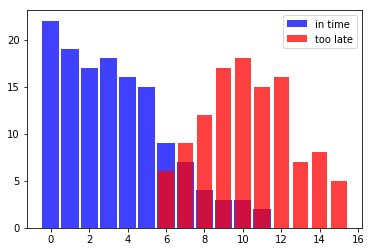

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
X, Y = zip(*in_time)
X2, Y2 = zip(*too_late)
bar_width = 0.9
plt.bar(X, Y, bar_width,  color="blue", alpha=0.75, label="in time")
bar_width = 0.8
plt.bar(X2, Y2, bar_width,  color="red", alpha=0.75, label="too late")
plt.legend(loc='upper right')
plt.show()

From this data we can deduce that the probability of catching the connecting train if we are one minute late is 1, because we had 19 successful cases experienced and no misses, i.e. there is no tuple with 1 as the first component in 'too_late'.

We will denote the event "train arrived in time to catch the connecting train" with S (success) and the 'unlucky' event "train arrived too late to catch the connecting train" with M (miss)

We can now define the probability "catching the train given that we are 1 minute late" formally:

P(S|1)=19/19=1
We used the fact that the tuple (1,19) is in 'in_time' and there is no tuple with the first component 1 in 'too_late'

It's getting critical for catching the connecting train to Munich, if we are 6 minutes late. Yet, the chances are still 60 %:

P(S|6)=9/9+6=0.6
Accordingly, the probability for missing the train knowing that we are 6 minutes late is:

P(M|6)=6/9+6=0.4

In [10]:
#We can write a 'classifier' function, which will give the probability for catching the connecting train:

in_time_dict = dict(in_time)
too_late_dict = dict(too_late)
def catch_the_train(min):
    s = in_time_dict.get(min, 0)
    if s == 0:
        return 0
    else:
        m = too_late_dict.get(min, 0)
        return s / (s + m)
for minutes in range(-1, 13):
    print(minutes, catch_the_train(minutes))

-1 0
0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 0.6
7 0.4375
8 0.25
9 0.15
10 0.14285714285714285
11 0.11764705882352941
12 0


# ANOTHER EXAMPLE

In [4]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [9]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [10]:
#similarly encode temp and play columns
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [12]:
#Combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [14]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


Here, 1 indicates that players can 'play'.

# NAIVE BAYES WITH MULTIPLE LABELS

In [18]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [19]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

C:\Users\ITSpark\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074
